Data will be reloaded
Loading data


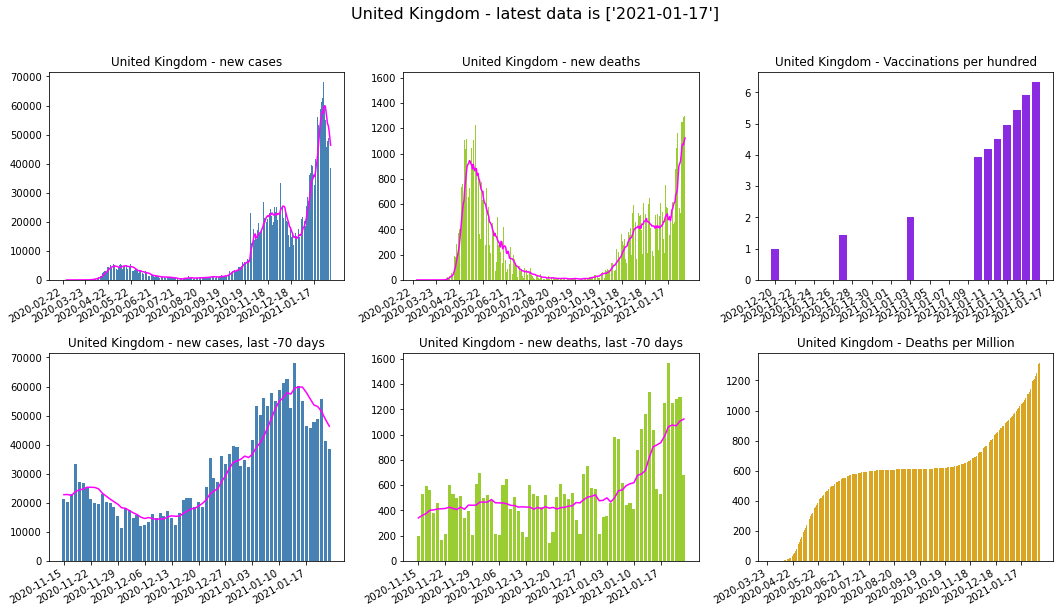

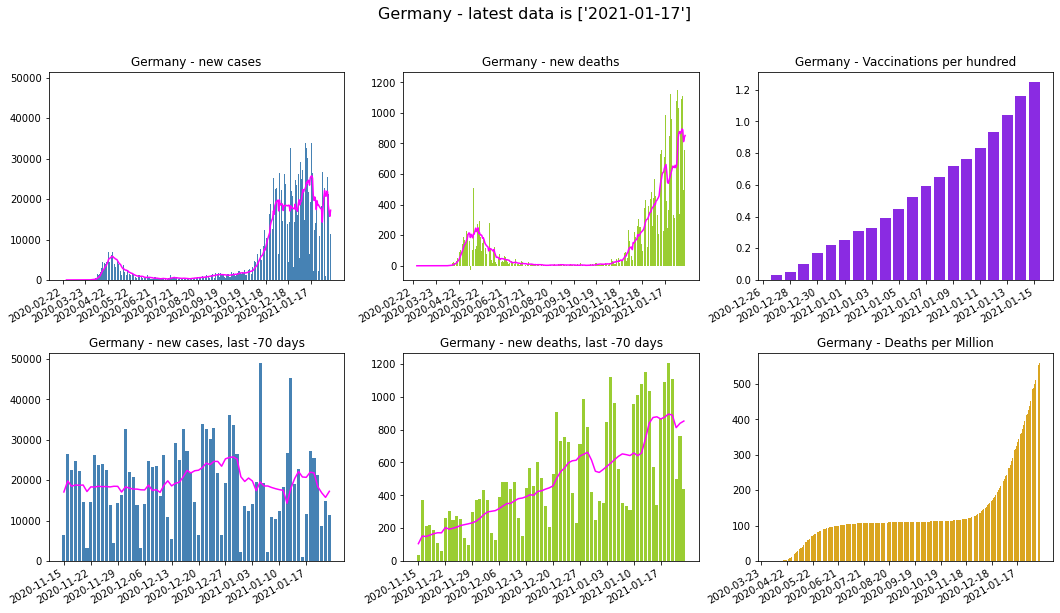

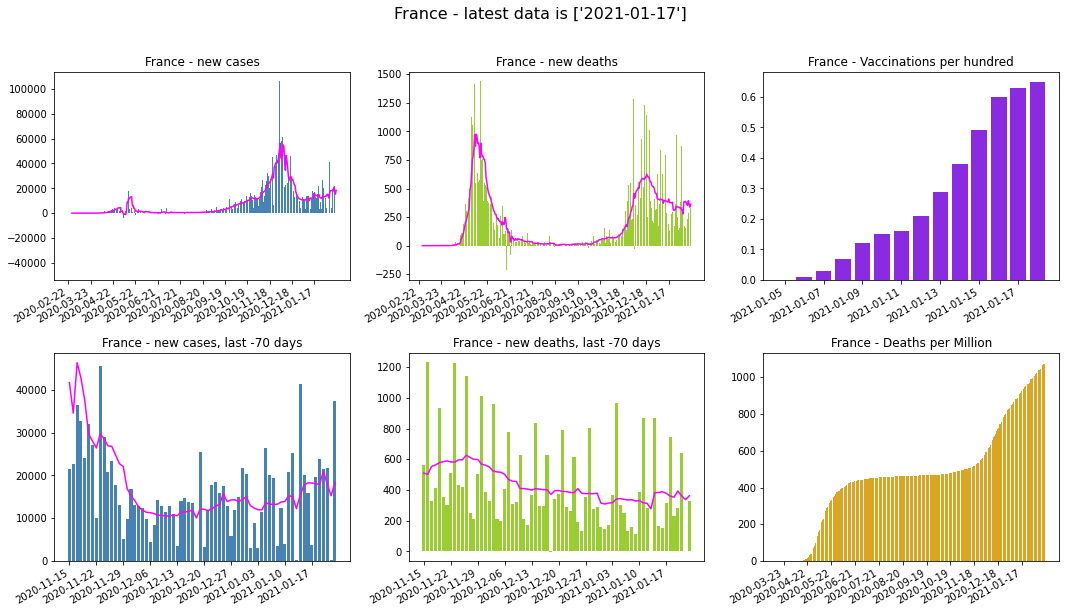

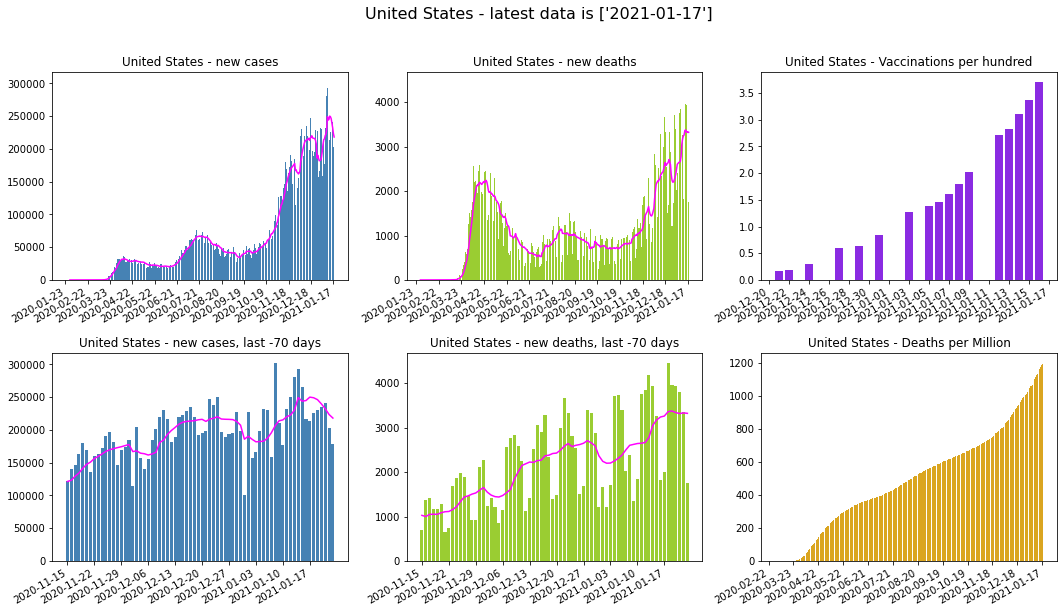

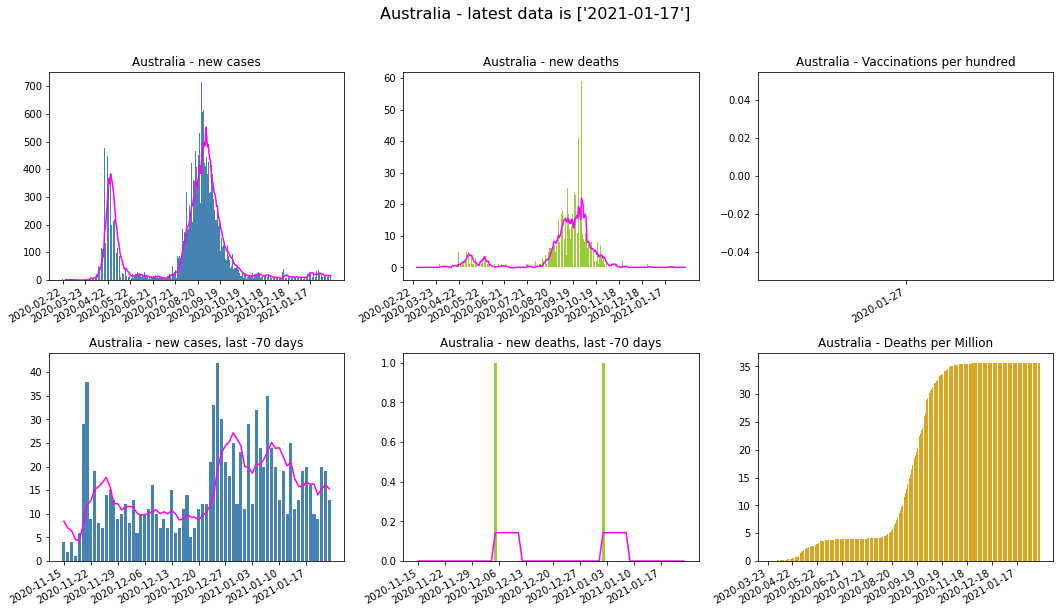

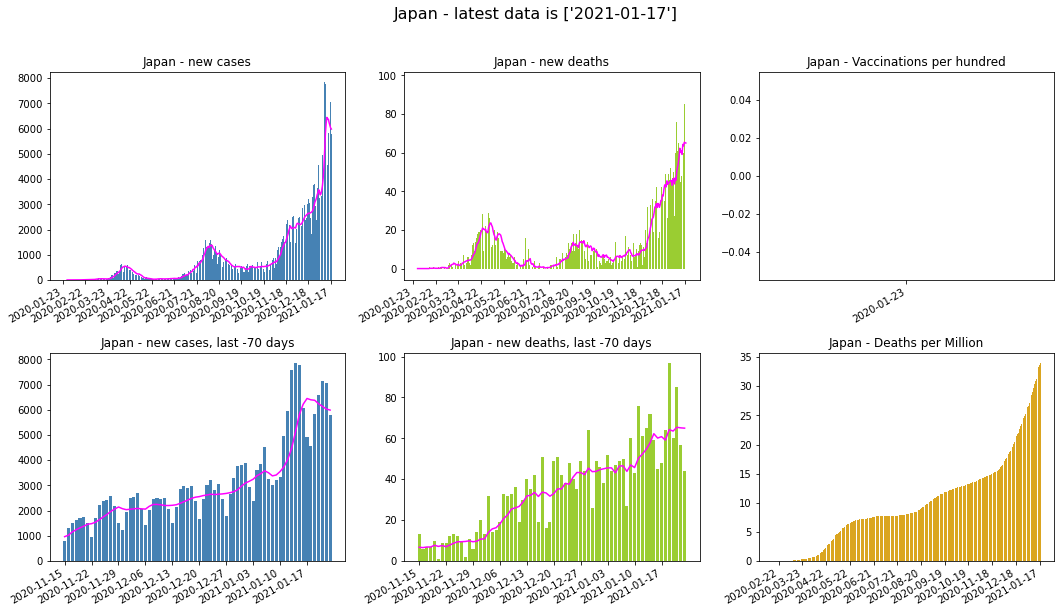

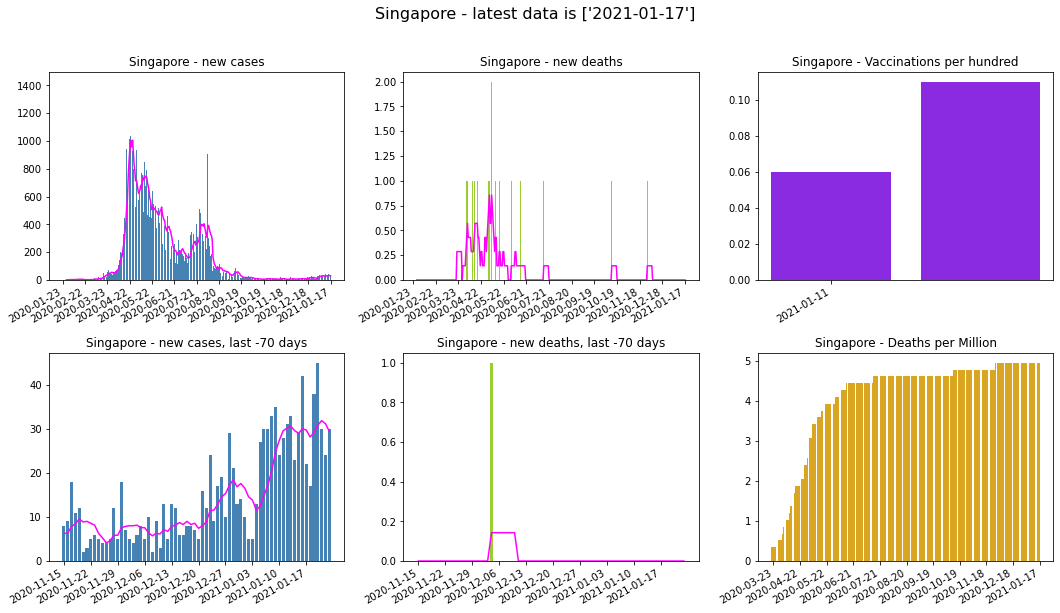

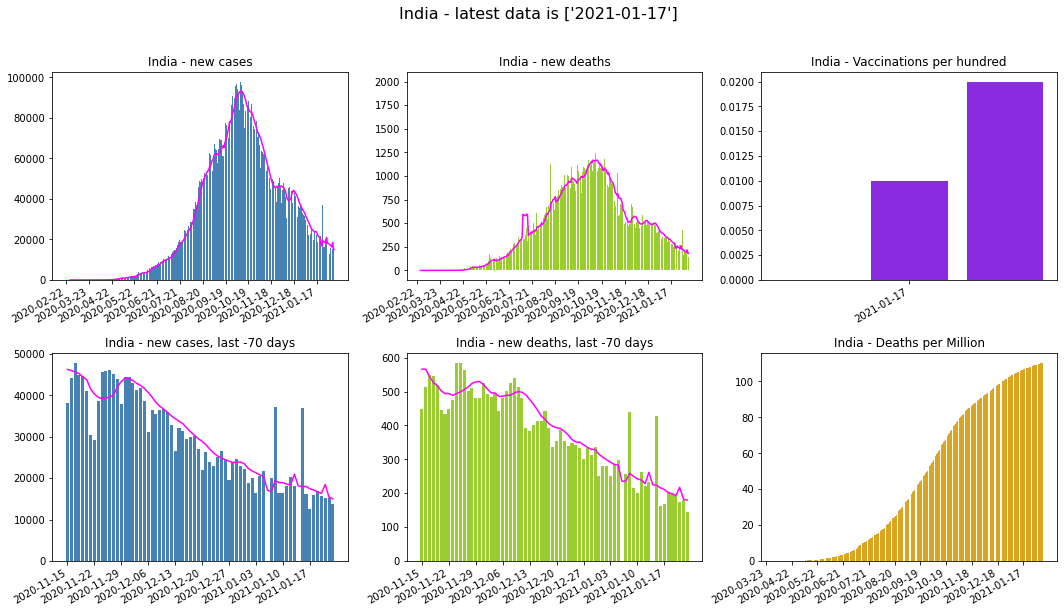

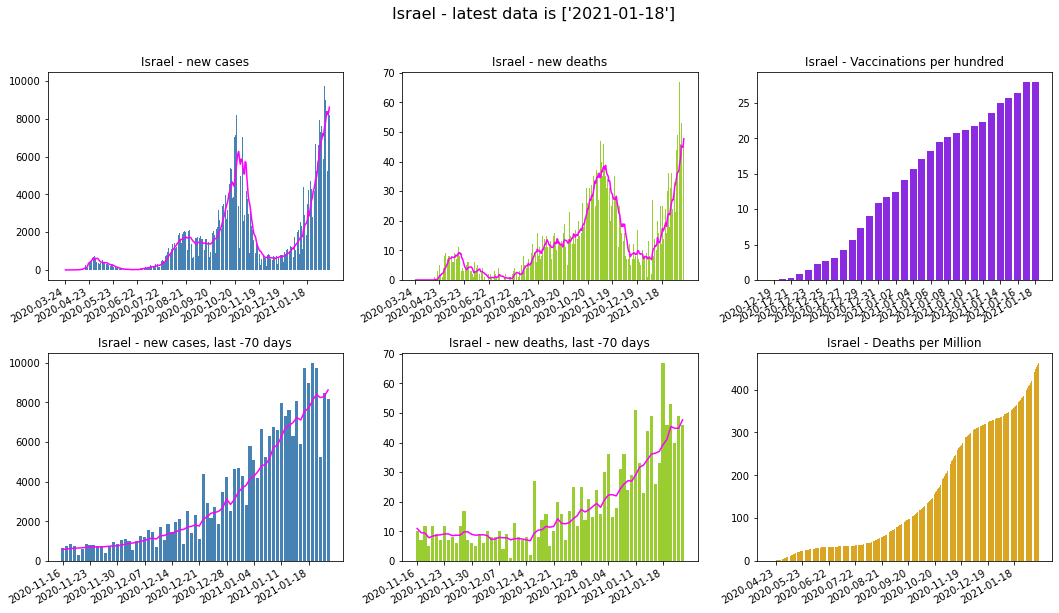

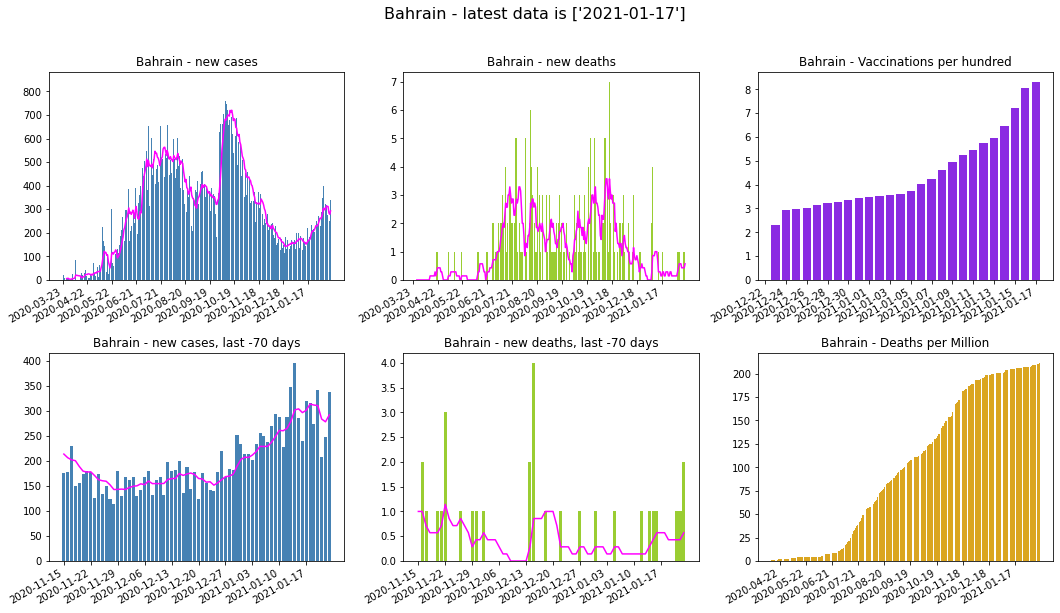

In [22]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pathlib import Path

downloads = f'{Path.home()}\\Downloads'

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print(f'Data already loaded: {dataStamp.strftime("%b-%d %H:%M")}')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
#    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y6, color='goldenrod')

    ### This is for the vaccinations, as we have less data we need more frequent data labels. 
    ticks = []    # empty array of tick positions
    i, step = 0, 2    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
#    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')

    fig.savefig(f'{downloads}\\{country}_OWD.png')

MEX


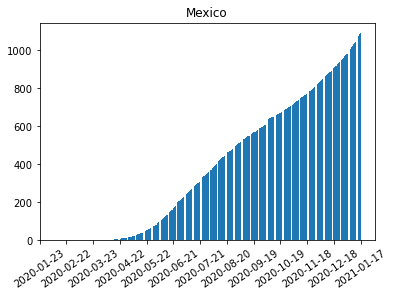

In [23]:
i = 0
for country in df.iso_code.unique():
    print(country)
    if pd.isna(country):
        pass
    else:
        df1 = df.loc[df.iso_code == country]
        plt.rcParams["figure.figsize"] = (6,4)
        plt.bar(df1.date, df1.total_deaths_per_million)
        plt.xticks(df1.date[-(df1.date.size//30) * 30 -1 ::30] ,  rotation=35)
        plt.title(df1.location.unique()[0])
        plt.show()
        i += 1
    if i == 1: break

In [24]:
for code in df.iso_code.unique():
    if not pd.isna(code):
        print(code)

MEX
ARG
THA
TWN
KOR
OWID_WRL
JPN
USA
CHN
VNM
SGP
FRA
CHE
MYS
NPL
CAN
ISR
AUS
LKA
DEU
KHM
DNK
ARE
FIN
IND
FJI
PHL
HKG
GBR
ITA
RUS
SWE
ESP
SVN
CZE
PRT
LVA
GRC
BEL
MLT
MAR
ZAF
EGY
NLD
GTM
IRN
LBN
NOR
LTU
CHL
LUX
IRQ
KWT
AFG
BHR
OMN
AUT
DZA
HRV
PAK
SRB
ROU
EST
MKD
BRA
GEO
ISL
SMR
NGA
NZL
BLR
SEN
MCO
QAT
IRL
ECU
AZE
ARM
DOM
SAU
IDN
AND
UKR
JOR
BGD
LIE
HUN
POL
TGO
LBY
TUN
PSE
BIH
KEN
BTN
VAT
SVK
CMR
PER
COL
CRI
PRY
BGR
MDV
MDA
PAN
CYP
BRN
ALB
BFA
MNG
TUR
COD
JAM
HND
BOL
CIV
CUB
GUY
GIN
URY
SDN
KAZ
ATG
ETH
VEN
GAB
SWZ
SUR
LCA
VCT
SYC
RWA
OWID_KOS
GHA
MRT
NAM
TTO
COG
UZB
GNQ
CAF
BHS
TZA
LBR
SOM
BEN
BRB
MNE
GMB
ZMB
KGZ
DJI
MUS
NIC
TCD
SLV
PNG
AGO
ZWE
HTI
NER
MDG
CPV
ERI
UGA
GRD
MOZ
TLS
DMA
SYR
BLZ
LAO
KNA
MLI
GNB
MMR
MWI
BWA
SLE
BDI
SSD
STP
YEM
TJK
COM
LSO
SLB
MHL
VUT
WSM


In [25]:
df = df.loc[df.iso_code != 'OWID_WRL']
for item in ['total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million',
            'icu_patients_per_million', 'total_tests_per_thousand', 'new_deaths_per_million']:
    print('####')
    print(df.loc[df[item].idxmax()][['location',item]])

####
location                          Israel
total_vaccinations_per_hundred     28.03
Name: 26839, dtype: object
####
location                    San Marino
total_deaths_per_million      1915.257
Name: 46541, dtype: object
####
location                      Andorra
total_cases_per_million    117556.462
Name: 1293, dtype: object
####
location                    Belgium
icu_patients_per_million    127.183
Name: 5493, dtype: object
####
location                    Luxembourg
total_tests_per_thousand      2850.884
Name: 32572, dtype: object
####
location                  Ecuador
new_deaths_per_million    218.329
Name: 16218, dtype: object


In [26]:
df.loc[df.iso_code == 'GBR'][['date','new_deaths']].sort_values(by=['new_deaths'], ascending=False)[:5]

,date,new_deaths
57401,2021-01-13,1568.0
57396,2021-01-08,1333.0
57404,2021-01-16,1299.0
57403,2021-01-15,1285.0
57402,2021-01-14,1253.0


In [27]:
df.loc[df.iso_code == 'GBR'][['date','new_cases']].sort_values(by=['new_cases'], ascending=False)[:5]

,date,new_cases
57396,2021-01-08,68192.0
57394,2021-01-06,62556.0
57393,2021-01-05,61087.0
57397,2021-01-09,60098.0
57392,2021-01-04,58923.0


In [28]:
i = df.loc[df.iso_code == 'GBR'].last_valid_index()
df.loc[i]

iso_code                                            GBR
continent                                        Europe
location                                 United Kingdom
date                                         2021-01-17
total_cases                                 3405740.000
new_cases                                     38670.000
new_cases_smoothed                            46338.857
total_deaths                                  89429.000
new_deaths                                      682.000
new_deaths_smoothed                            1123.143
total_cases_per_million                       50168.515
new_cases_per_million                           569.631
new_cases_smoothed_per_million                  682.598
total_deaths_per_million                       1317.341
new_deaths_per_million                           10.046
new_deaths_smoothed_per_million                  16.545
reproduction_rate                                   NaN
icu_patients                                    

In [34]:
EU_Countries = df.loc[df.continent == 'Europe']['location'].unique()

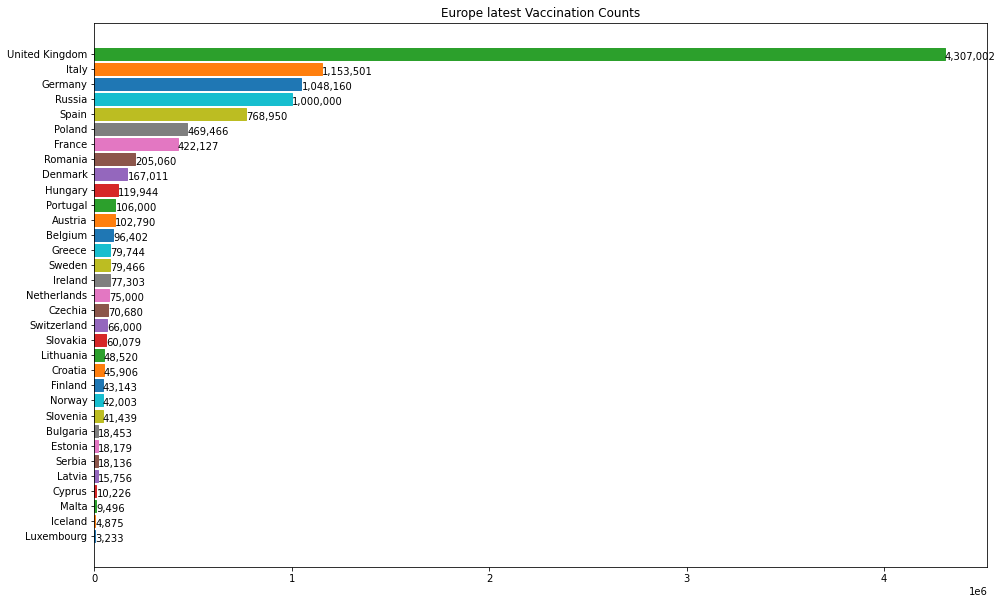

In [130]:
x = []
y = []
for country in EU_Countries:
    idx = df.loc[df.location == country]['total_vaccinations'].idxmax()
    if not np.isnan(idx):
        vax = df.loc[idx]['total_vaccinations']
#        print(vax , ' ' , country)
        x.append(country)
        y.append(vax)

newdf = pd.DataFrame( {'country': x, 'vaccines': y})
newdf.sort_values(by='vaccines', inplace=True, ignore_index=True)



fig, ax = plt.subplots(figsize = (16,10))  

# create an array with each of the bars in 
bars = ax.barh( newdf['country'], newdf['vaccines'] )

i = 0
for bar in bars:
    value = int(newdf.loc[i]['vaccines'])
    ax.annotate(f'{value:,}', 
               xy = ( (bar.get_x() + bar.get_width() ) , bar.get_y() )
               )
    bar.set_color(f'C{i}')
    i += 1

plt.title("Europe latest Vaccination Counts")

plt.show()

fig.savefig(f'{downloads}\\Vaccines_OWD.png')

In [67]:
bars[1]

In [83]:
f'{1234567:,}'

'1,234,567'

In [109]:
newdf = pd.DataFrame( {'country': x, 'vaccines': y})

In [115]:
newdf.sort_values(by='vaccines',inplace=True)

In [125]:
newdf.loc[0]['vaccines']

422127.0

In [126]:
newdf

,country,vaccines
20,Luxembourg,3233.0
26,Iceland,4875.0
16,Malta,9496.0
32,Cyprus,10226.0
13,Latvia,15756.0
23,Serbia,18136.0
25,Estonia,18179.0
31,Bulgaria,18453.0
10,Slovenia,41439.0
18,Norway,42003.0
